**PNEUMONIA DETECTION USING DEEP LEARNING METHODOLOY**

**Members**



Jane Martha,
Najma Abdi,
Brian Ochieng,
Eunice Ngunjiri,
Jubilant Mutuku,
Frida Oyucho,

**Project Overview**

The project focuses on leveraging a dataset of chest X-ray images to develop machine learning models capable of accurately diagnosing pneumonia. The dataset, sourced from Kaggle, comprises images classified into two categories: pneumonia and normal. This project aims to build and optimize convolutional neural network (CNN) models to achieve high diagnostic accuracy.

**Problem Statement**

Pneumonia is a life-threatening infection of the lungs that results in millions of hospitalizations and deaths worldwide each year. Early and accurate diagnosis is critical for effective treatment and better patient outcomes. Chest X-ray imaging is the most commonly used diagnostic tool for pneumonia, but interpreting these images can be challenging and requires significant expertise. In many parts of the world, especially in resource-limited settings, there is a shortage of trained radiologists, which can delay diagnosis and treatment.

**Dataset Description**


***Source***: Kaggle's Chest X-Ray Images (Pneumonia) dataset.
***Structure***: The dataset is organized into three primary directories:
***train***: Contains training images categorized into 'PNEUMONIA' and 'NORMAL'.
***val***: Contains validation images for model tuning and performance evaluation.
***test***: Contains test images for final model evaluation.

**Objectives**

The objective of this project is to leverage deep learning techniques to develop an automated system capable of accurately diagnosing pneumonia from chest X-ray images. This system aims to:

Provide reliable diagnostic assistance to healthcare professionals.
Reduce the diagnostic workload in hospitals and clinics.
Improve diagnostic accuracy and speed, especially in areas with limited access to radiologists.

**Specific Goals**


***1: Data Understanding and Preparation:***

Load, explore, and preprocess the Chest X-Ray Images (Pneumonia) dataset to ensure it is suitable for model training.
Implement data augmentation techniques to enhance the training dataset and improve model generalization.
Model Development:

***2: Model Development:***

Build and train a baseline convolutional neural network (CNN) model to classify chest X-ray images as 'PNEUMONIA' or 'NORMAL'.
Experiment with different model architectures and layers to improve performance.
Hyperparameter Tuning:

***3:Hyperparameter Tuning:***

Utilize Keras Tuner to perform hyperparameter optimization, focusing on key parameters such as learning rate, batch size, and network depth.
Model Evaluation:

***4:Model Evaluation:***

Evaluate the model's performance using accuracy, precision, recall, and F1-score on validation and test datasets.
Ensure the model's robustness and ability to generalize to new, unseen data.
Result Analysis and Visualization:

***5:Result Analysis and Evaluation:***

Analyze and visualize the training history, including loss and accuracy curves, to understand the model's learning dynamics.
Compare training, validation, and test performance to detect and address potential overfitting or underfitting.
Clinical Integration:

***6: Clinical Integration***

Propose a strategy for integrating the developed model into clinical workflows to assist in the diagnosis of pneumonia.
Research Questions


**Research Questions**
1: Can a convolutional neural network (CNN) accurately classify chest X-ray images as 'PNEUMONIA' or 'NORMAL'?
What are the optimal hyperparameters for achieving the highest diagnostic accuracy in the CNN model?
2:How well does the model generalize to new, unseen chest X-ray images?
3:What are the practical considerations for integrating this model into clinical settings?


**Significance**
Developing an automated pneumonia detection system has significant potential to:

Enhance the speed and accuracy of pneumonia diagnosis, leading to timely and effective treatment.
Support healthcare providers in areas with limited access to trained radiologists.
Reduce the burden on medical professionals by providing a reliable second opinion.

**Data Preprocessing**
Resizing: Images were resized to 224x224 pixels to maintain uniformity.
Normalization: Pixel values were rescaled to a range of 0 to 1 to facilitate faster convergence during training.
Augmentation: Data augmentation techniques, such as rotation and flipping, were applied to the training set to enhance model generalization.

**Downloading and Extracting Dataset from Kaggle**

In [1]:
# Install Kaggle
!pip install kaggle

# Make a directory for Kaggle and move kaggle.json there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the downloaded dataset
!unzip chest-xray-pneumonia.zip -d chest_xray

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/chest_xray/train

**IMPORTING DESIRED LIBRARIES**

In [69]:
import pandas as pd
import numpy as np

import tensorflow as tf
import pathlib

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import datetime

import tensorflow as tf



In [70]:
# Define the path to the dataset
data_dir = pathlib.Path("chest_xray/chest_xray")


**LOADING DATASET**

In [71]:
# Load the dataset
image_count = len(list(data_dir.glob('*/*/*.jpeg')))
print(f'Total number of images: {image_count}')


Total number of images: 5856


In [10]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir / 'train',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir / 'val',
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir / 'test',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [6]:
# Print the class names
class_names = train_ds.class_names
print(f'Class names: {class_names}')

Class names: ['NORMAL', 'PNEUMONIA']


**UNDERSTANIG THE DATASET**

 To understand the structure of the dataset first we examined the directory structure and counted the number of images in each class for training, validation, and testing sets.

In [12]:
# Define paths to the dataset directories
train_dir = pathlib.Path("chest_xray/chest_xray/train")
val_dir = pathlib.Path("chest_xray/chest_xray/val")
test_dir = pathlib.Path("chest_xray/chest_xray/test")


In [13]:
# Function to count images in each subdirectory
def count_images(directory):
    normal_count = len(list(directory.glob('NORMAL/*')))
    pneumonia_count = len(list(directory.glob('PNEUMONIA/*')))
    return normal_count, pneumonia_count

In [14]:
 #Count images in train, validation, and test sets
train_normal_count, train_pneumonia_count = count_images(train_dir)
val_normal_count, val_pneumonia_count = count_images(val_dir)
test_normal_count, test_pneumonia_count = count_images(test_dir)

print(f"Training set: {train_normal_count} NORMAL, {train_pneumonia_count} PNEUMONIA")
print(f"Validation set: {val_normal_count} NORMAL, {val_pneumonia_count} PNEUMONIA")
print(f"Test set: {test_normal_count} NORMAL, {test_pneumonia_count} PNEUMONIA")

Training set: 1341 NORMAL, 3875 PNEUMONIA
Validation set: 8 NORMAL, 8 PNEUMONIA
Test set: 234 NORMAL, 390 PNEUMONIA


**Exploring the dataset**

By exploring the dataset in these steps,  gain insights into its structure, sample images, class distribution, and image properties. This understanding  helped in  making informed decisions when preprocessing the data and training your model.

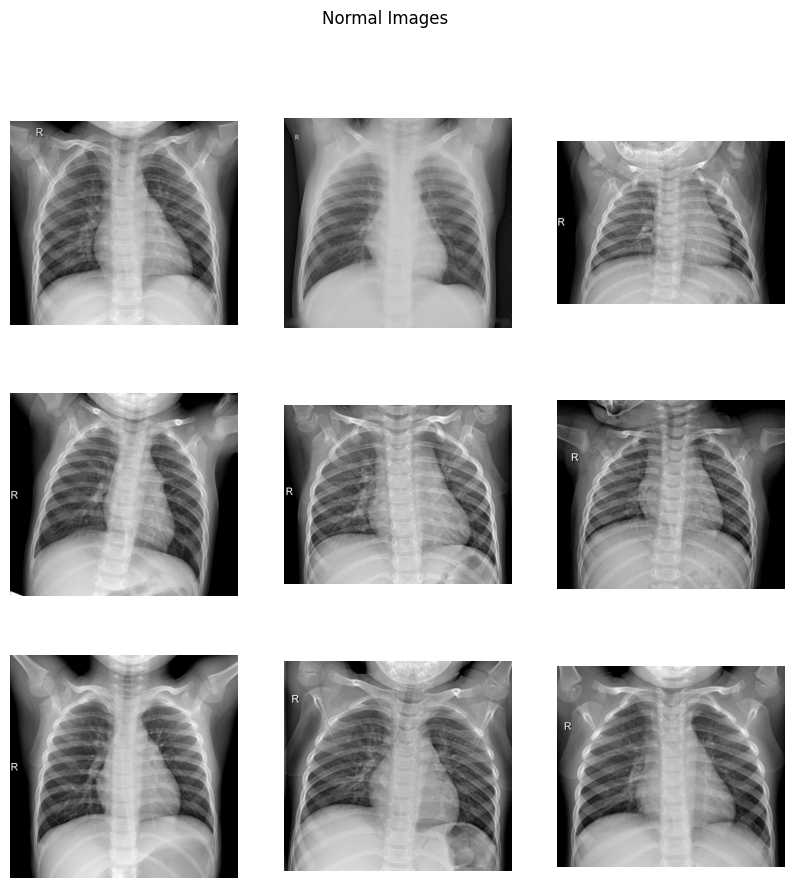

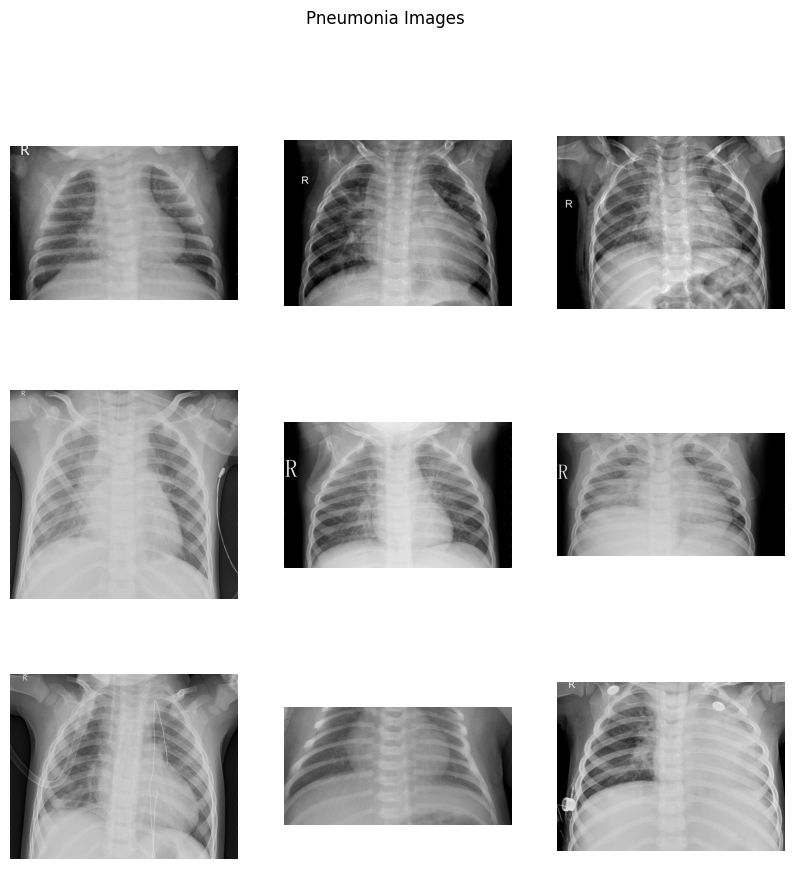

In [18]:
def show_samples(image_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths[:9]):
        plt.subplot(3, 3, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Show samples of Normal and Pneumonia images from the training set
train_normal_images = list(train_dir.glob('NORMAL/*'))
train_pneumonia_images = list(train_dir.glob('PNEUMONIA/*'))

show_samples(train_normal_images, "Normal Images")
show_samples(train_pneumonia_images, "Pneumonia Images")

***Visualizing a sample of images***

Visualizing a few sample images from each class can provide insights into the data. The displayed images are from both the NORMAL and PNEUMONIA classes for the training set.

*Checking for class imbalance*

In [22]:
# Creating a DataFrame to summarize the counts
data_summary = pd.DataFrame({
    'Set': ['Training', 'Validation', 'Test'],
    'Normal': [train_normal_count, val_normal_count, test_normal_count],
    'Pneumonia': [train_pneumonia_count, val_pneumonia_count, test_pneumonia_count]
})


In [23]:
print(data_summary)

          Set  Normal  Pneumonia
0    Training    1341       3875
1  Validation       8          8
2        Test     234        390


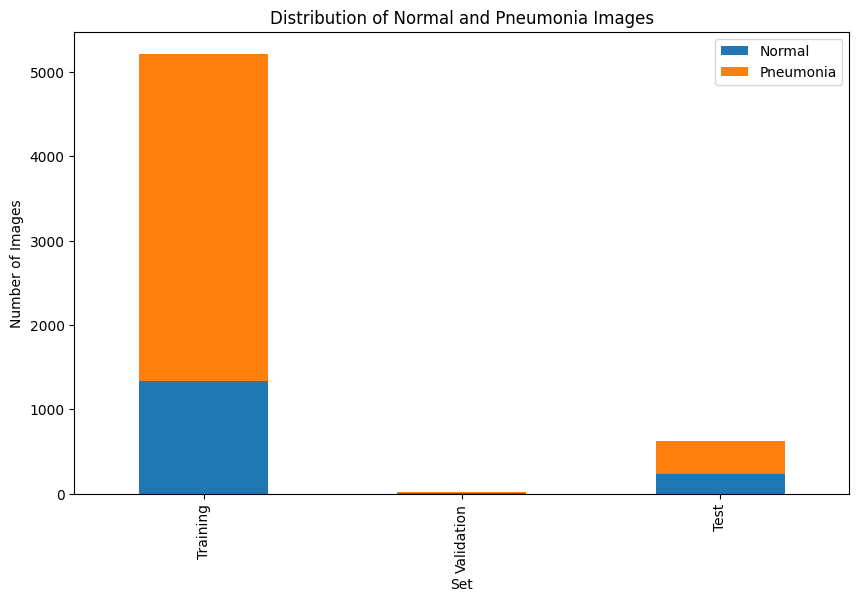

In [24]:
# Plot the distribution
data_summary.plot(kind='bar', x='Set', stacked=True, figsize=(10, 6))
plt.title('Distribution of Normal and Pneumonia Images')
plt.ylabel('Number of Images')
plt.show()

The class imbalance, as it can affect the model's performance. We compared the number of images in each class as it displayed on the above histogram

**Displaying Images Dimensions**

We tried to  understand the dimensions and pixel values of images in order to  perform preprocessing.

python


Normal Image:
Dimensions: (1646, 1476)
Pixel range: 0 - 255


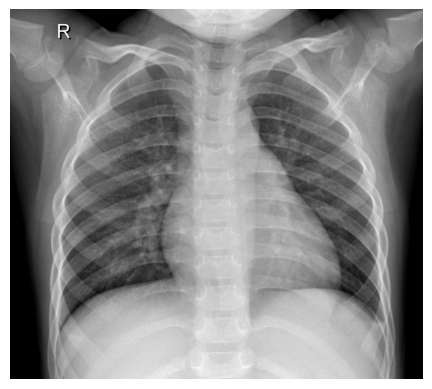

Pneumonia Image:
Dimensions: (936, 632)
Pixel range: 0 - 255


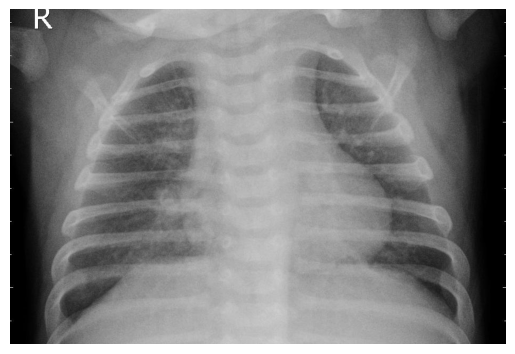

In [32]:
def display_image_info(image_paths, title):
    # Load an image
    img_path = image_paths[0]
    img = Image.open(img_path)
    img_array = np.array(img)

    # Display image info
    print(f"{title} Image:")
    print(f"Dimensions: {img.size}")
    print(f"Pixel range: {img_array.min()} - {img_array.max()}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Display information for a sample image from each class
display_image_info(train_normal_images, "Normal")
display_image_info(train_pneumonia_images, "Pneumonia")

The displayed images shows the chest of a normal personal while the second images shows the chest of a person who has been affected by pneumonia

**PREPROCESSING**

This step involves preparing the data for the model. This includes tasks like resizing images, normalizing pixel values, data augmentation, and splitting the data into training and validation.

***Resizing the Images and Normalizaton***


We resized the image to Ensure they are of the the same size.

Normalization is a fundamental preprocessing step when working with image data in machine learning models. By dividing pixel values by 255, you ensure that the pixel values are within a manageable range for the model to learn effectively. This process helps in stabilizing the training process and often leads to better model performance.

Data augmentation introduces variations of training images (such as rotations, flips, and zooms), which can help the model generalize better to new data. It's typically applied only to the training set.








In [78]:
#Performing resizing process
#Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 3

#Performing Augmentation Process
# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5,2.0],
    width_shift_range = 0.2,
    rotation_range=20,
    fill_mode = 'nearest'
)
#Performing Normalization Process
val_test_datagen = ImageDataGenerator(rescale=1./255)


# Create generators for training, validation, and testing sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Assuming binary classification (NORMAL vs PNEUMONIA)
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The two ImageDataGenerator objects, Image_gen and val_Datagen, which are in charge of data augmentation and normalization, were initialized above.
 Normalization is carried out by the Image_gen object by rescaling the pixel values to the interval [0, 1]. It also incorporates augmentation methods like rotation, shearing, zooming, flipping both horizontally and vertically, brightness modifications, width shifting, and nearest fill mode. These additions contribute to the training data's increased robustness and diversity, which in turn strengthens the model's capacity for generalization. To ensure consistency with the training procedure, the val_Datagen object, on the other hand, only uses rescaling for normalization to the validation data.

**MODEL ARCHITECTURE**

Building a Convolutional Neural Network (CNN) model. A simple model might consist of several convolutional layers followed by pooling layers and a few dense layers.

Evaluate the model on the validation and test sets to assess its performance. Monitor metrics such as accuracy, loss, precision, recall, and F1-score.

***Compiling the model***


Compiling the model with an appropriate optimizer, loss function, and metrics. This step configures the model for training.

In [95]:
import matplotlib.pyplot as plt

def train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=30):
    """
    Train the model, evaluate on validation and test sets, plot training history (loss and accuracy),
    and plot train vs test accuracy and train vs test loss.
    """
    start = datetime.datetime.now()

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        verbose=1
    )

    # Record the training duration
    end = datetime.datetime.now()
    training_duration = end - start
    print(f"Training completed in: {training_duration}")

    # Evaluate on validation set
    validation_loss, validation_accuracy = model.evaluate(validation_generator)
    print("Validation Loss:", validation_loss)
    print("Validation Accuracy:", validation_accuracy)

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Plot training history (loss and accuracy)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

    # Plot train vs test accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Test Accuracy')
    plt.legend()
    plt.show()

    # Plot train vs test loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Test Loss')
    plt.legend()
    plt.show()

    return history

To incorporate timing functionality to measure the duration of the model training process, we used the datetime module to record the start and end times.

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

***cnn_model Function***:This function defines a basic CNN architecture suitable for image classification tasks. It starts with convolutional layers followed by max-pooling to reduce spatial dimensions, flattens the output, adds dense layers for classification, and includes dropout for regularization.

In [86]:
# Define input shape based on your image dimensions (e.g., (height, width, channels))
input_shape = (224, 224, 3)

# Create the baseline CNN model
baseline_model = cnn_model(input_shape)

***Input Shape***: We define input_shape as (224, 224, 3), assuming images are 224x224 pixels with 3 channels (RGB).

In [87]:
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model Compilation: Compiled the model using the Adam optimizer, binary cross-entropy loss (suitable for binary classification), and accuracy metric for evaluation.

In [88]:
baseline_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 26, 26, 128)      

Model Summary: Print a summary of the model architecture, showing the layer types, output shapes, and number of parameters.

The baseline model architecture comprises a total of 11,169,089 parameters, with all parameters being trainable. The model's size is approximately 42.61 MB. There are no non-trainable parameters in this architecture, showing that all parameters are updated during the training process.

Creating Data Generator

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/30
163/163 [==============================] - 610s 4s/step - loss: 0.3016 - accuracy: 0.8865 - val_loss: 0.3929 - val_accuracy: 0.7500
Epoch 2/30
163/163 [==============================] - 601s 4s/step - loss: 0.1460 - accuracy: 0.9471 - val_loss: 0.4829 - val_accuracy: 0.8125
Epoch 3/30
163/163 [==============================] - 600s 4s/step - loss: 0.0981 - accuracy: 0.9636 - val_loss: 0.8181 - val_accuracy: 0.7500
Epoch 4/30
163/163 [==============================] - 600s 4s/step - loss: 0.0849 - accuracy: 0.9666 - val_loss: 0.3357 - val_accuracy: 0.8750
Epoch 5/30
163/163 [==============================] - 597s 4s/step - loss: 0.0846 - accuracy: 0.9697 - val_loss: 0.5098 - val_accuracy: 0.8125
Epoch 6/30
163/163 [==============================] - 599s 4s/step - loss: 0.0581 - accuracy: 0.9806 - val_loss: 0.2073 - val_accuracy: 0.8750
Epoch 7/30
163/163 

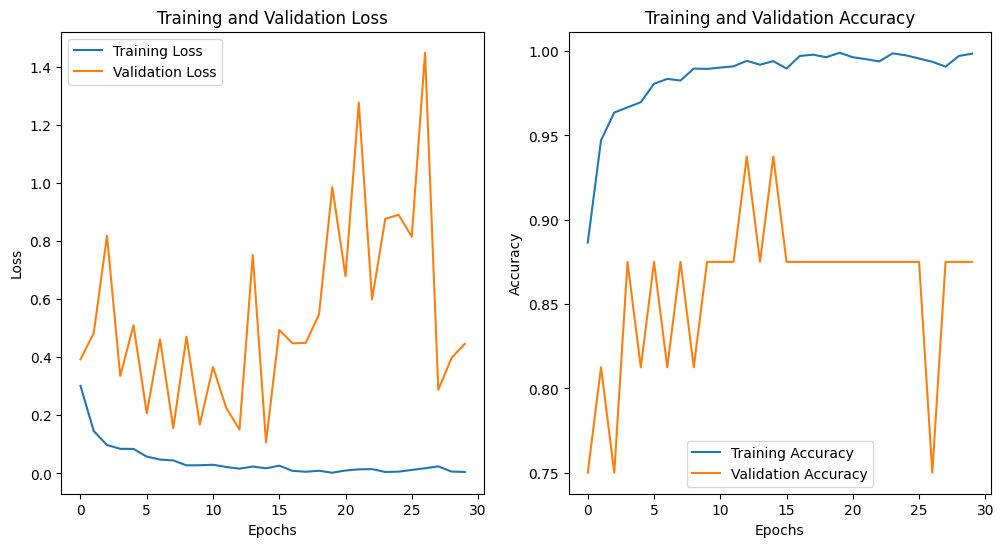

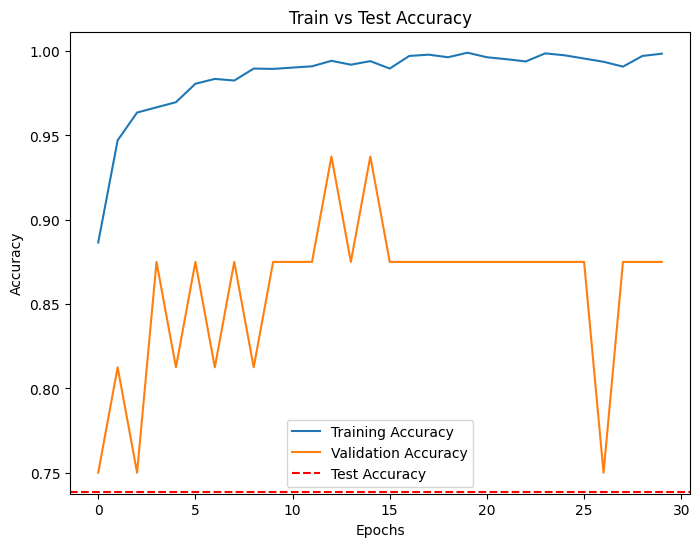

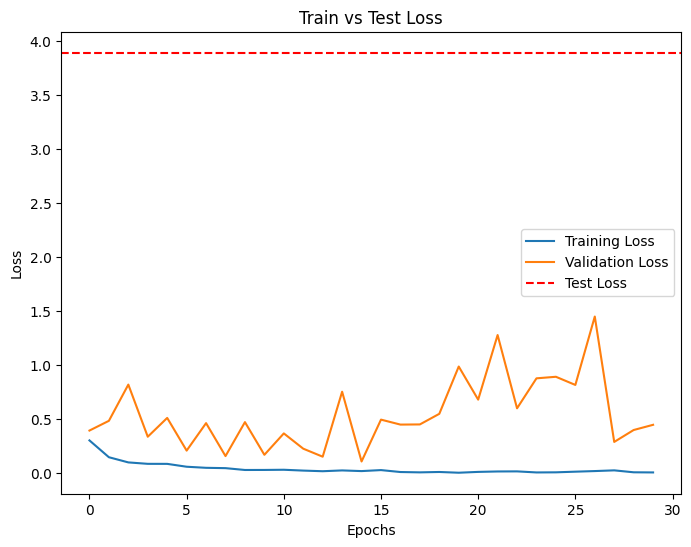

In [96]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('chest_xray/chest_xray/train', target_size=(224, 224), batch_size=32, class_mode='binary')
validation_generator = val_datagen.flow_from_directory('chest_xray/chest_xray/val', target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory('chest_xray/chest_xray/test', target_size=(224, 224), batch_size=32, class_mode='binary')

# Train and evaluate the model
history = train_and_evaluate_model(baseline_model, train_generator, validation_generator, test_generator, epochs=30)

**Building CNN TUNED BASELINE MODEL**

This is a machine learning model that has undergone hyperparameter optimization to improve its performance. Hyperparameters are settings that influence how the model is trained and evaluated, such as learning rate, batch size, number of layers, number of neurons per layer, and dropout rate. Tuning these parameters helps in finding the most effectiv

**Defining Model and Tuning Function**

In [ ]:
def tune_model(hp):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    tune_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='tuned_baseline_cnn'
)

Hyperparameter Tuning

In [ ]:
# Starting the search for the best hyperparameters
tuner.search(train_generator, validation_data=validation_generator, epochs=10)

# Getingt the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Building the model with the best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]

**Training and Evaluating the best model**

In [ ]:
# Define a function for training and evaluating the model
def train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=30):
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, verbose=1)
    validation_loss, validation_accuracy = model.evaluate(validation_generator, verbose=0)
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

    print("Validation Loss:", validation_loss)
    print("Validation Accuracy:", validation_accuracy)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

    return history

# Train and evaluate the best model
train_and_evaluate_model(best_model, train_generator, validation_generator, test_generator, epochs=30)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def train_and_evaluate_model_es(model, train_generator, validation_generator, test_generator, epochs=30):
    """
    Train the model, evaluate on validation and test sets, plot training history (loss and accuracy),
    and plot train vs test accuracy and train vs test loss.
    """
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[early_stopping],  # Pass the early stopping callback
        verbose=1
    )

    # Evaluate on validation set
    validation_loss, validation_accuracy = model.evaluate(validation_generator, verbose=0)
    print("Validation Loss:", validation_loss)
    print("Validation Accuracy:", validation_accuracy)

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Plot training history (loss and accuracy)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

    # Plot train vs test accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Test Accuracy')
    plt.legend()
    plt.show()

    # Plot train vs test loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Test Loss')
    plt.legend()
    plt.show()

    return history

In [ ]:
# Start the search for the best hyperparameters
tuner.search(train_generator, validation_data=validation_generator, epochs=10)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Build the model with the best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]

# Train and evaluate the best model with early stopping
history = train_and_evaluate_model_es(best_model, train_generator, validation_generator, test_generator, epochs=30)

**Applying Complex Architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def new_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define input shape based on your image dimensions (e.g., (height, width, channels))
input_shape = (224, 224, 3)

# Create the new CNN model
new_model = new_cnn_model(input_shape)

# Compile the model
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
new_model.summary()

In [ ]:
# Train and evaluate the new model with early stopping
history_new_model = train_and_evaluate_model_es(new_model, train_generator, validation_generator, test_generator, epochs=30)

pre-trained ResNet50V2 architecture

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Define the function to create the ResNet50V2 model
def resnet_model(input_shape):
    # Load pre-trained ResNet50V2 model without the top (fully connected) layers
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze all layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a Sequential model
    model = Sequential(name='ResNet50V2')

    # Add the pre-trained ResNet50V2 model to the Sequential model
    model.add(base_model)

    # Add global average pooling layer to reduce parameters
    model.add(GlobalAveragePooling2D())

    # Add a fully connected layer with fewer neurons
    model.add(Dense(64, activation='relu'))

    # Add dropout layer
    model.add(Dropout(0.5))

    # Add output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

# Define input shape based on your image dimensions (e.g., (height, width, channels))
input_shape = (224, 224, 3)

# Create the ResNet50V2 model
resnet_model_instance = resnet_model(input_shape)

# Compile the model
resnet_model_instance.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model_instance.summary()

Model Architecture:

The ResNet50V2 model is loaded with pre-trained weights from ImageNet, excluding the top layers (include_top=False).
All layers of the pre-trained model are frozen to prevent them from being updated during training.
The model is wrapped in a Sequential model.
A GlobalAveragePooling2D layer is added to reduce the number of parameters.
A Dense layer with 64 neurons and ReLU activation is added.
A Dropout layer is added to prevent overfitting.
A final Dense layer with a sigmoid activation function is added for binary classification.

***Training and Evaluating the Model***

In [ ]:
history_resnet_model = train_and_evaluate_model_es(resnet_model_instance, train_generator, validation_generator, test_generator, epochs=30)

Hyperparameter tuning for ResNet50V2 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from kerastuner.tuners import RandomSearch

# Define the model building function
def build_resnet_model(hp):
    input_shape = (224, 224, 3)

    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze all layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential(name='ResNet50V2')
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Set up the RandomSearch tuner
tuner = RandomSearch(
    build_resnet_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials for thoroughness
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='resnet50v2_tuning'
)

# Run the tuning process
tuner.search(train_generator, validation_data=validation_generator, epochs=10)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: Dense Units: {best_hps.get('dense_units')}, Dropout Rate: {best_hps.get('dropout_rate')}, Learning Rate: {best_hps.get('learning_rate')}")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train and evaluate the best model with early stopping
history_best_model = train_and_evaluate_model_es(best_model, train_generator, validation_generator, test_generator, epochs=30)